## 23-03-2025

In [26]:
#  Visualize Association Rules (Network Graph)

import pandas as pd
data = [['milk', 'bread', 'butter'],
        ['beer', 'bread'],
        ['milk', 'bread', 'butter', 'beer'],
        ['bread', 'butter']]

df = pd.DataFrame({'Transaction': data})
df

,Transaction
0,"[milk, bread, butter]"
1,"[beer, bread]"
2,"[milk, bread, butter, beer]"
3,"[bread, butter]"


In [30]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

In [31]:
te=TransactionEncoder()

In [32]:
te_ary=te.fit(data).transform(data)
te_ary

array([[False,  True,  True,  True],
       [ True,  True, False, False],
       [ True,  True,  True,  True],
       [False,  True,  True, False]])

In [33]:
df_encoded=pd.DataFrame(te_ary,columns=te.columns_)
df_encoded

,beer,bread,butter,milk
0,False,True,True,True
1,True,True,False,False
2,True,True,True,True
3,False,True,True,False


In [34]:
frequent_itemset=apriori(df_encoded,min_support=0.5,use_colnames=True)
frequent_itemset

,support,itemsets
0,0.50,(beer)
1,1.00,(bread)
2,0.75,(butter)
3,0.50,(milk)
4,0.50,"(bread, beer)"
5,0.75,"(bread, butter)"
6,0.50,"(bread, milk)"
7,0.50,"(milk, butter)"
8,0.50,"(milk, bread, butter)"


In [39]:
rules=association_rules(frequent_itemset,metric="lift",min_threshold=0.8,num_itemsets='int')
rules

C:\Users\91805\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(bread),(beer),1.00,0.50,0.50,0.500000,1.000000,1.0,0.000,1.0,0.0,0.500000,0.000000,0.750000
1,(beer),(bread),0.50,1.00,0.50,1.000000,1.000000,1.0,0.000,inf,0.0,0.500000,0.000000,0.750000
2,(bread),(butter),1.00,0.75,0.75,0.750000,1.000000,1.0,0.000,1.0,0.0,0.750000,0.000000,0.875000
3,(butter),(bread),0.75,1.00,0.75,1.000000,1.000000,1.0,0.000,inf,0.0,0.750000,0.000000,0.875000
4,(bread),(milk),1.00,0.50,0.50,0.500000,1.000000,1.0,0.000,1.0,0.0,0.500000,0.000000,0.750000
5,(milk),(bread),0.50,1.00,0.50,1.000000,1.000000,1.0,0.000,inf,0.0,0.500000,0.000000,0.750000
6,(milk),(butter),0.50,0.75,0.50,1.000000,1.333333,1.0,0.125,inf,0.5,0.666667,1.000000,0.833333
7,(butter),(milk),0.75,0.50,0.50,0.666667,1.333333,1.0,0.125,1.5,1.0,0.666667,0.333333,0.833333
8,"(bread, milk)",(butter),0.50,0.75,0.50,1.000000,1.333333,1.0,0.125,inf,0.5,0.666667,1.000000,0.833333
9,"(milk, butter)",(bread),0.50,1.00,0.50,1.000000,1.000000,1.0,0.000,inf,0.0,0.500000,0.000000,0.750000


In [40]:
import networkx as nx
import matplotlib.pyplot as plt

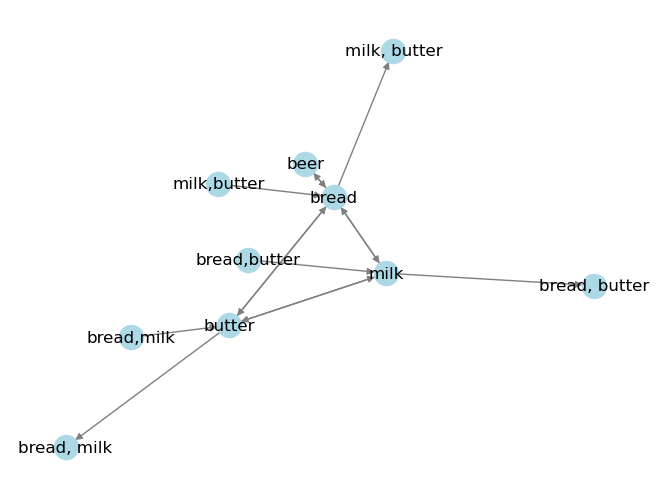

In [42]:
G=nx.DiGraph()
for _,row in rules.iterrows():
    G.add_edge(','.join(row['antecedents']),', '.join(row['consequents']),weight=row['lift'])

pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()



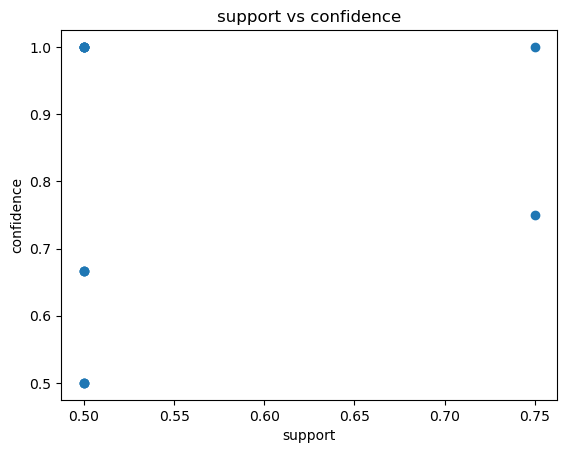

In [43]:
# Association Rules on Synthetic Data with Scatter Plot of Support vs Confidence
import random

items=['milk','bread','butter','jam','cheese','eggs']
data=[[random.choice(items) for _ in range(random.randint(2,4))] for _ in range(20)]

plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('support vs confidence')
plt.show()

In [1]:
# Filter High-Lift Rules (>2) from Groceries Dataset

import pandas as pd
df=pd.read_csv('Groceries_dataset.csv')
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [2]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth,association_rules

In [3]:
basket=df.groupby(['Member_number','Date'])['itemDescription'].apply(list).reset_index()
basket

,Member_number,Date,itemDescription
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"
...,...,...,...
14958,4999,24-01-2015,"[tropical fruit, berries, other vegetables, yo..."
14959,4999,26-12-2015,"[bottled water, herbs]"
14960,5000,09-03-2014,"[fruit/vegetable juice, onions]"
14961,5000,10-02-2015,"[soda, root vegetables, semi-finished bread]"


In [4]:
te=TransactionEncoder()

In [5]:
te_ary=te.fit(basket['itemDescription']).transform(basket['itemDescription'])
te_ary

array([[False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [6]:
df_encoded=pd.DataFrame(te_ary,columns=te.columns_)
df_encoded

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)
print(frequent_itemsets.head())

    support       itemsets
0  0.157923   (whole milk)
1  0.085879       (yogurt)
2  0.060349      (sausage)
3  0.051728       (pastry)
4  0.018780  (salty snack)


In [13]:
rules = association_rules(frequent_itemsets, num_itemsets=len(df_encoded),metric="confidence", min_threshold=0.05)

In [14]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,1.0,-0.002401,0.967861,-0.190525,0.047975,-0.033206,0.100317
1,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,1.0,-0.002401,0.983638,-0.203508,0.047975,-0.016634,0.100317
2,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,1.0,-0.003707,0.956636,-0.260917,0.047776,-0.045329,0.096694
3,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,1.0,-0.003707,0.974663,-0.274587,0.047776,-0.025995,0.096694
4,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,1.0,-0.003404,0.976350,-0.224474,0.055000,-0.024222,0.107711
5,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,1.0,-0.003404,0.964550,-0.214986,0.055000,-0.036752,0.107711
6,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,1.0,-0.002872,0.974249,-0.236553,0.047662,-0.026432,0.091235
7,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,1.0,-0.002872,0.971117,-0.234091,0.047662,-0.029742,0.091235
8,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,1.0,-0.004446,0.968928,-0.262461,0.055948,-0.032068,0.107730
9,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,1.0,-0.004446,0.958551,-0.254477,0.055948,-0.043241,0.107730


In [15]:
import networkx as nx
import matplotlib.pyplot as plt

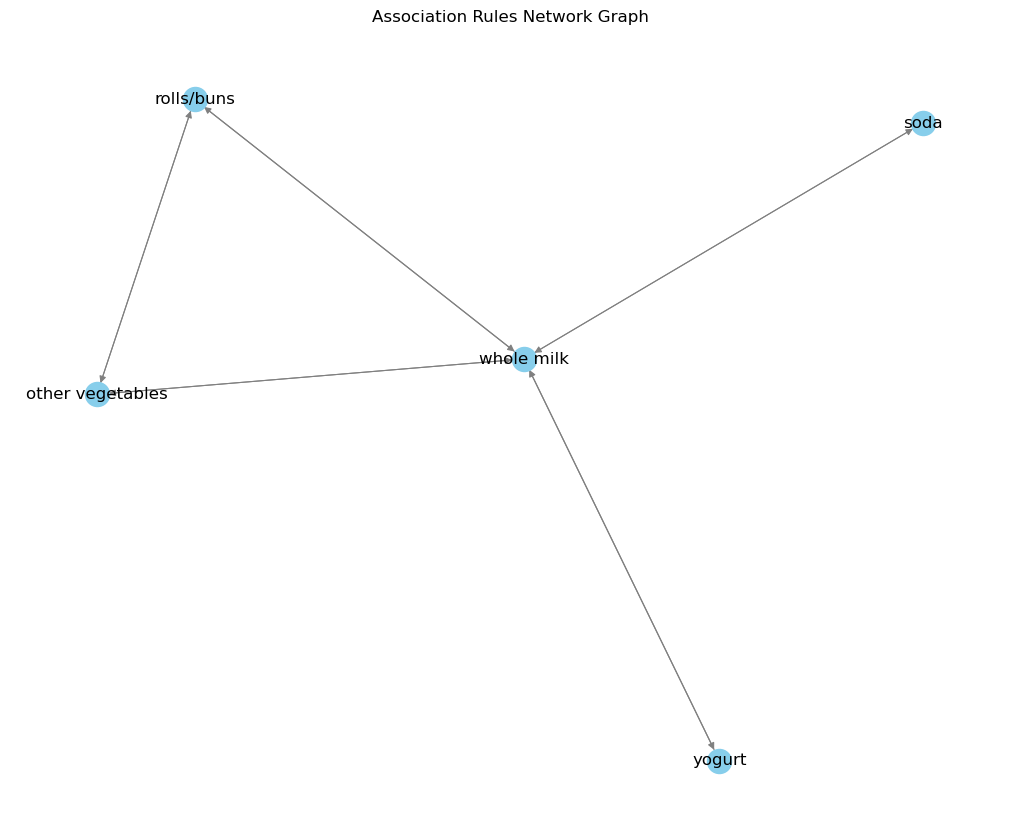

In [16]:
G = nx.DiGraph()

for _, row in rules.iterrows():
    G.add_edge(', '.join(list(row['antecedents'])), ', '.join(list(row['consequents'])), weight=row['lift'])

pos = nx.spring_layout(G, k=0.5, iterations=50)
edges = G.edges(data=True)
weights = [edata['weight'] for _, _, edata in edges]

plt.figure(figsize=(10,8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', width=weights)
plt.title("Association Rules Network Graph")
plt.show()

In [18]:
rules = association_rules(frequent_itemsets, num_itemsets=len(df_encoded),metric="lift", min_threshold=0.05)

In [20]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,1.0,-0.002401,0.967861,-0.190525,0.047975,-0.033206,0.100317
1,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,1.0,-0.002401,0.983638,-0.203508,0.047975,-0.016634,0.100317
2,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,1.0,-0.003707,0.956636,-0.260917,0.047776,-0.045329,0.096694
3,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,1.0,-0.003707,0.974663,-0.274587,0.047776,-0.025995,0.096694
4,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,1.0,-0.003404,0.976350,-0.224474,0.055000,-0.024222,0.107711
5,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,1.0,-0.003404,0.964550,-0.214986,0.055000,-0.036752,0.107711
6,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,1.0,-0.002872,0.974249,-0.236553,0.047662,-0.026432,0.091235
7,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,1.0,-0.002872,0.971117,-0.234091,0.047662,-0.029742,0.091235
8,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,1.0,-0.004446,0.968928,-0.262461,0.055948,-0.032068,0.107730
9,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,1.0,-0.004446,0.958551,-0.254477,0.055948,-0.043241,0.107730


In [22]:
high_lift_rules = rules[rules['lift'] > 2]

if not high_lift_rules.empty:
    high_lift_rules[['antecedents', 'consequents', 'lift']].plot(
        kind='bar', 
        x='antecedents', 
        y='lift',
        figsize=(10,5),
        color='skyblue'
    )
    plt.title('High Lift Rules')
    plt.ylabel('Lift')
    plt.show()
else:
    print("🚩 No rules found with lift > 2.")


🚩 No rules found with lift > 2.


In [23]:
high_lift_rules = rules[rules['lift'] > 1.1]


In [24]:
print(rules[['antecedents', 'consequents', 'lift']].sort_values(by='lift', ascending=False).head(10))


          antecedents         consequents      lift
0            (yogurt)        (whole milk)  0.822940
1        (whole milk)            (yogurt)  0.822940
5        (rolls/buns)        (whole milk)  0.804028
4        (whole milk)        (rolls/buns)  0.804028
6  (other vegetables)        (rolls/buns)  0.786154
7        (rolls/buns)  (other vegetables)  0.786154
9  (other vegetables)        (whole milk)  0.769430
8        (whole milk)  (other vegetables)  0.769430
2              (soda)        (whole milk)  0.758296
3        (whole milk)              (soda)  0.758296


In [ ]:
# Association Rules with Minimum Support and Lift Constraints

